# Step 1 : Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## Read the data

In [2]:
data = pd.read_excel('C:\\Users\\pawan\\Downloads\\Bank_Personal_Loan_Modelling.xlsx', sheet_name='Data')
# The location where data file is present

In [3]:
data.head()
# first 5 rows of data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
data.tail()
# last 5 rows of data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [5]:
print('Shape of Dataframe is ', data.shape)
# size of data

Shape of Dataframe is  (5000, 14)


In [6]:
data.describe().T
# transpose of data

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


# Step 2 : Clean the data

In [7]:
data.isnull().sum()
# The machine learning algorithm can’t train a dataset with missing values, so we have to check for missing values and if any,
# we treat them using different method based on the kind of missing values we have.

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# Step 3 : Study the data

### Number of unique in each column

In [8]:
for column in data.columns :
    print(f' Unique values in column {column} = {len(set(data[column]))}')

 Unique values in column ID = 5000
 Unique values in column Age = 45
 Unique values in column Experience = 47
 Unique values in column Income = 162
 Unique values in column ZIP Code = 467
 Unique values in column Family = 4
 Unique values in column CCAvg = 108
 Unique values in column Education = 3
 Unique values in column Mortgage = 347
 Unique values in column Personal Loan = 2
 Unique values in column Securities Account = 2
 Unique values in column CD Account = 2
 Unique values in column Online = 2
 Unique values in column CreditCard = 2


### Number of people with zero mortage

In [9]:
print('Number of people with zero Mortgage = ',len(data[data['Mortgage']==0]))

Number of people with zero Mortgage =  3462


### Number of people with zero credit card spending per month

In [10]:
print('Number of people with zero Credit Card spending per month = ', len(data[data['CCAvg']==0]))

Number of people with zero Credit Card spending per month =  106


### Value count of all categorical columns

In [11]:
categorical_columns = []

for column in data.columns :
    if len(set(data[column])) != len(data) :
        categorical_columns.append(column)

for column in categorical_columns :
    print(f' Value counts for column {column}')
    print(data[column].value_counts())
    print()

 Value counts for column Age
35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64

 Value counts for column Experience
 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 39     85
 2      85
 1      74
 0      66
 40     57
 41     4

### Univariate Analysis

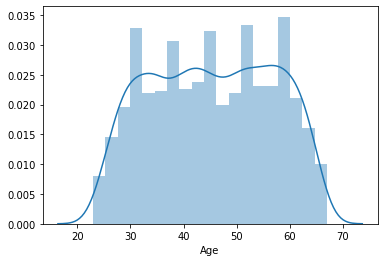

In [12]:
sns.distplot(data.Age)
# Age varies from (20,70), so bar graphs will be best for its representation.

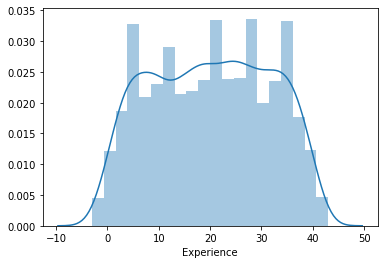

In [13]:
sns.distplot(data.Experience)
# Experience varies from (-10,50), so bar graphs will be best for its representation.

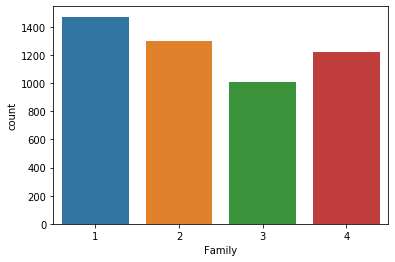

In [14]:
sns.countplot(data.Family)
# Family varies from (1,4), so count graphs will be best for its representation.

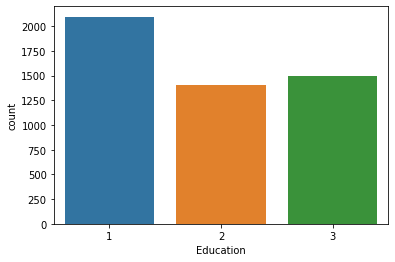

In [15]:
sns.countplot(data.Education)
# Education varies from (1,3), so count graphs will be best for its representation.

### Bivariate Analysis

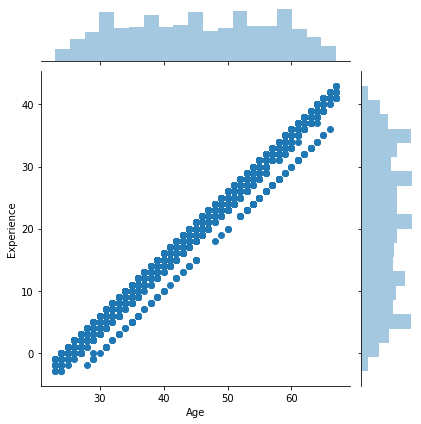

In [16]:
sns.jointplot('Age', 'Experience', data = data, kind='scatter')
# There is a saying ('Experience' increases with 'Age') and this representation shows this

### Multi-variate Analysis

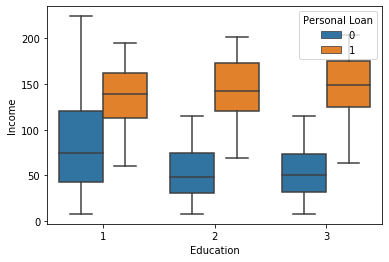

In [17]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=data)

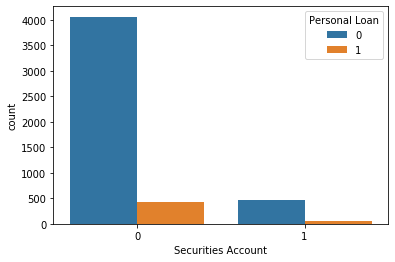

In [18]:
sns.countplot(x="Securities Account", data=data,hue="Personal Loan")

# Step 4 : Remove unnecessary featues 

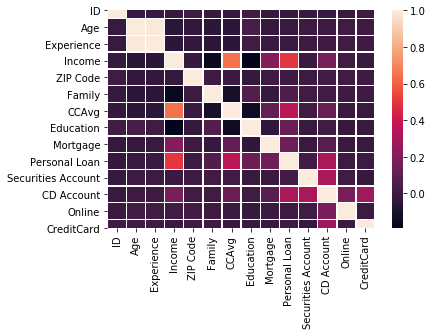

In [19]:
sns.heatmap(data.corr(), linewidths=0.5)

In [20]:
data.drop(['ID', 'ZIP Code', 'Experience'], axis=1, inplace=True)
# ID and ZIP code does not play any role in Loan prediction, Experience and  Age are related from the heat map, so we can ignore one.

In [21]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


# Step 5 : Normalization and Spliting of data

### Normalization

In [22]:
columns_to_scale = ['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage']

for column in columns_to_scale:
    scaler = MinMaxScaler()
    data[column] = scaler.fit_transform(data[column].values.reshape(-1, 1))

In [23]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0.045455,0.189815,1.000000,0.16,0.0,0.0,0,1,0,0,0
1,0.500000,0.120370,0.666667,0.15,0.0,0.0,0,1,0,0,0
2,0.363636,0.013889,0.000000,0.10,0.0,0.0,0,0,0,0,0
3,0.272727,0.425926,0.000000,0.27,0.5,0.0,0,0,0,0,0
4,0.272727,0.171296,1.000000,0.10,0.5,0.0,0,0,0,0,1


### Training & Testing

In [24]:
X = data.drop(['Personal Loan'], axis=1)
y = data['Personal Loan'].values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify= y,random_state=17)

In [26]:
class_names = ['wont take loan', 'take loan']

# Step 6 : Logistic Regression

In [27]:
logReg = LogisticRegression(C=1.0, max_iter=200)
logReg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
print('Logistic Regression Results: ')

print('Training Accuracy:', logReg.score(X_train, y_train).round(2))
print('Testing Accuracy:', logReg.score(X_test, y_test).round(2))

y_pred = logReg.predict(X_test)

print('Precision:', precision_score(y_test, y_pred, labels=class_names).round(2))
print('Recall:', recall_score(y_test, y_pred).round(2))

Logistic Regression Results: 
Training Accuracy: 0.95
Testing Accuracy: 0.95
Precision: 0.85
Recall: 0.53


# Step 7 : Random Forest Classifier

In [29]:
rfClf = RandomForestClassifier(n_estimators=300, max_depth=7,n_jobs=-1 )
rfClf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [30]:
print('Random Forest Classifier Results: ')

print('Training Accuracy:', rfClf.score(X_train, y_train).round(2))
print('Testing Accuracy:', rfClf.score(X_test, y_test).round(2))

y_pred = rfClf.predict(X_test)

print('Precision:', precision_score(y_test, y_pred, labels=class_names).round(2))
print('Recall:', recall_score(y_test, y_pred).round(2))

Random Forest Classifier Results: 
Training Accuracy: 0.99
Testing Accuracy: 0.98
Precision: 0.95
Recall: 0.85


### Thus the best result is obtained from Random Forest Classifier